# Data Augmentation.

In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import matplotlib.pyplot as plt
import itertools
import numpy as np

%matplotlib inline

In [0]:
#Function to plot the images with labels.
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

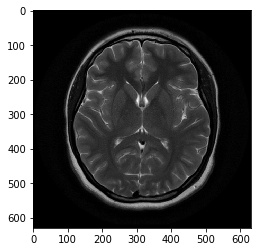

In [8]:
#Obtain the image.
img_path = 'train/no/1 no.jpeg'
image = cv2.imread(img_path)
plt.imshow(image)

In [0]:
#reshape the image
image = image.reshape((1,)+image.shape)
#from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.15, 
                         zoom_range=0.1, channel_shift_range=10, horizontal_flip=True)
#Generate batches of augmented data from this image
aug_iter = gen.flow(image)
#Generating 10 samples from this image.
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

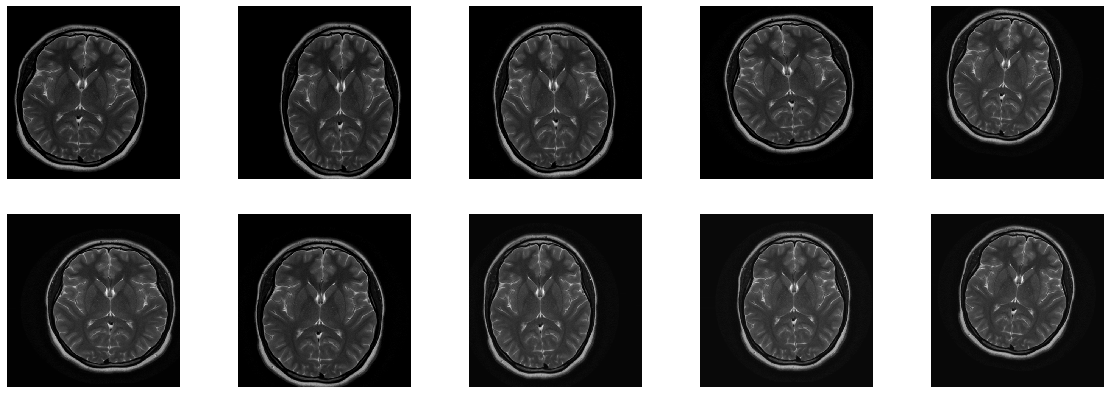

In [10]:
#Plotting the augmented image.
plots(aug_images, figsize=(20, 7), rows=2)

In [0]:
def data_augmentation(file_dir):
  gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.15, 
                         zoom_range=0.1, channel_shift_range=10, horizontal_flip=True)

  #Looping through each images in the current file_dir
  for filename in os.listdir(file_dir):
    img_path = file_dir + '/' + filename
    image = cv2.imread(img_path)
    image = image.reshape((1,)+image.shape)
    
    #Each image is saved with the prefix 'aug'
    save_prefix = 'aug_' + filename[:-4]

    #The augmented images are saved into the directory augmented_data
    save_to_dir = 'augmented_data/' + file_path

    #Images saved in jpg format
    aug_iter = gen.flow(image, save_to_dir=save_to_dir, save_prefix=save_prefix, save_format='jpg')
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [ ]:
#Function call 
#Performing data augmentation on the images in train, valid and test directory.
data_augmentation('train/yes')
data_augmentation('train/no')
data_augmentation('valid/yes')
data_augmentation('valid/no')
data_augmentation('test/yes')
data_augmentation('test/no')